In [18]:
!pip install ctgan

In [19]:
!pip install table_evaluator

In [1]:
!pip install dpython

  Preparing metadata (setup.py) ... done
  Created wheel for dpython: filename=dpython-1.0.5-py3-none-any.whl size=5090 sha256=4d2c2e65fa15ff4dc163bf9f8e79c5f7022625eb1c12f2b715581a244fe68274
  Stored in directory: /root/.cache/pip/wheels/93/71/70/cced7ee373cea27a16181a637a83215e4ac72bd20eac1e8f9e
Successfully built dpython


In [21]:
!gdown 1CFLXcella3VFDzPJRGrfkG1YNohf1RCQ

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1CFLXcella3VFDzPJRGrfkG1YNohf1RCQ

but Gdown can't. Please check connections and permissions.


In [24]:
import pandas as pd
data = pd.read_csv('insurance.csv')

In [23]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
categorical_features = ['children','age','sex', 'smoker', 'region']

In [26]:
from ctgan import CTGAN
ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs=200)

Gen. (0.01) | Discrim. (-0.12): 100%|██████████| 200/200 [00:51<00:00,  3.89it/s]


In [28]:
samples = ctgan.sample(1000)

In [29]:
samples

,age,sex,bmi,children,smoker,region,charges
0,64,female,31.332613,0,no,southeast,15226.444269
1,54,female,25.214947,0,no,northwest,-496.678076
2,58,male,20.671250,0,no,southwest,458.504199
3,43,male,34.349787,2,no,southwest,2571.790044
4,25,female,30.245094,1,yes,northeast,17493.620201
...,...,...,...,...,...,...,...
995,18,male,28.100708,2,no,southwest,2321.345568
996,51,male,33.025241,1,no,northwest,11938.709428
997,52,male,27.944590,0,yes,southeast,-615.497013
998,28,female,25.559946,2,no,northeast,7024.340949


***Evaluation***

(1338, 7) (1000, 7)


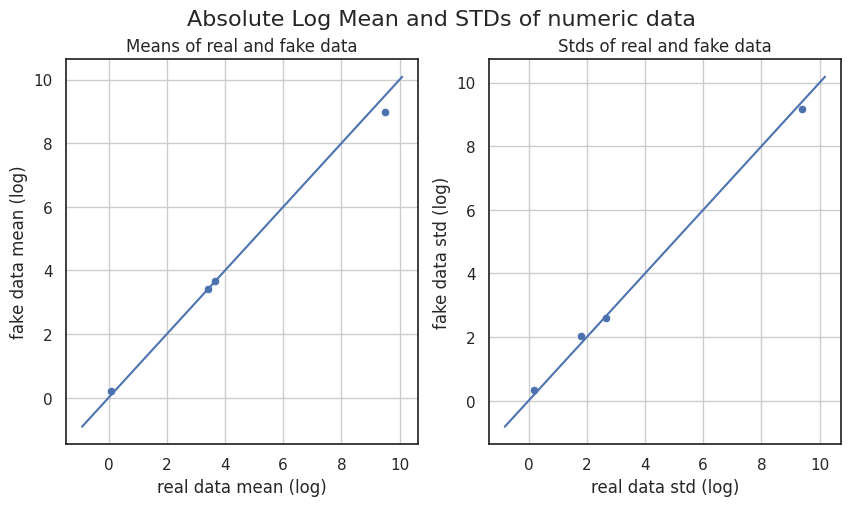

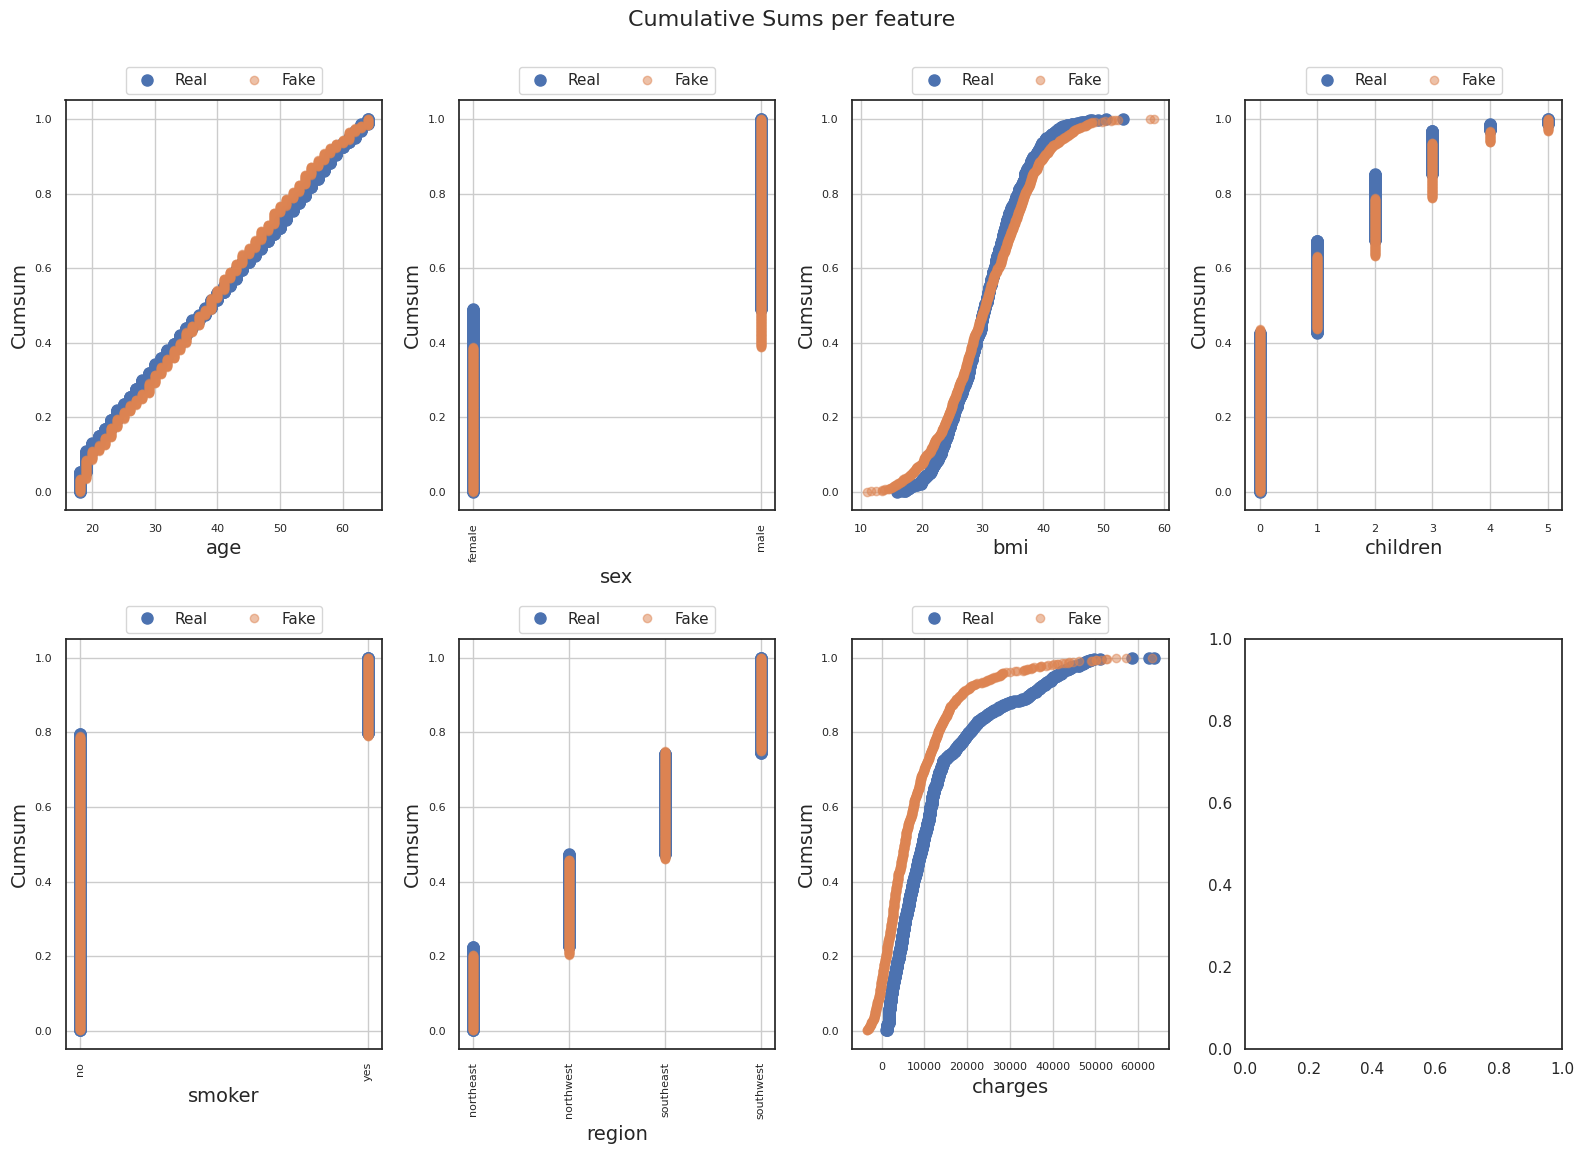

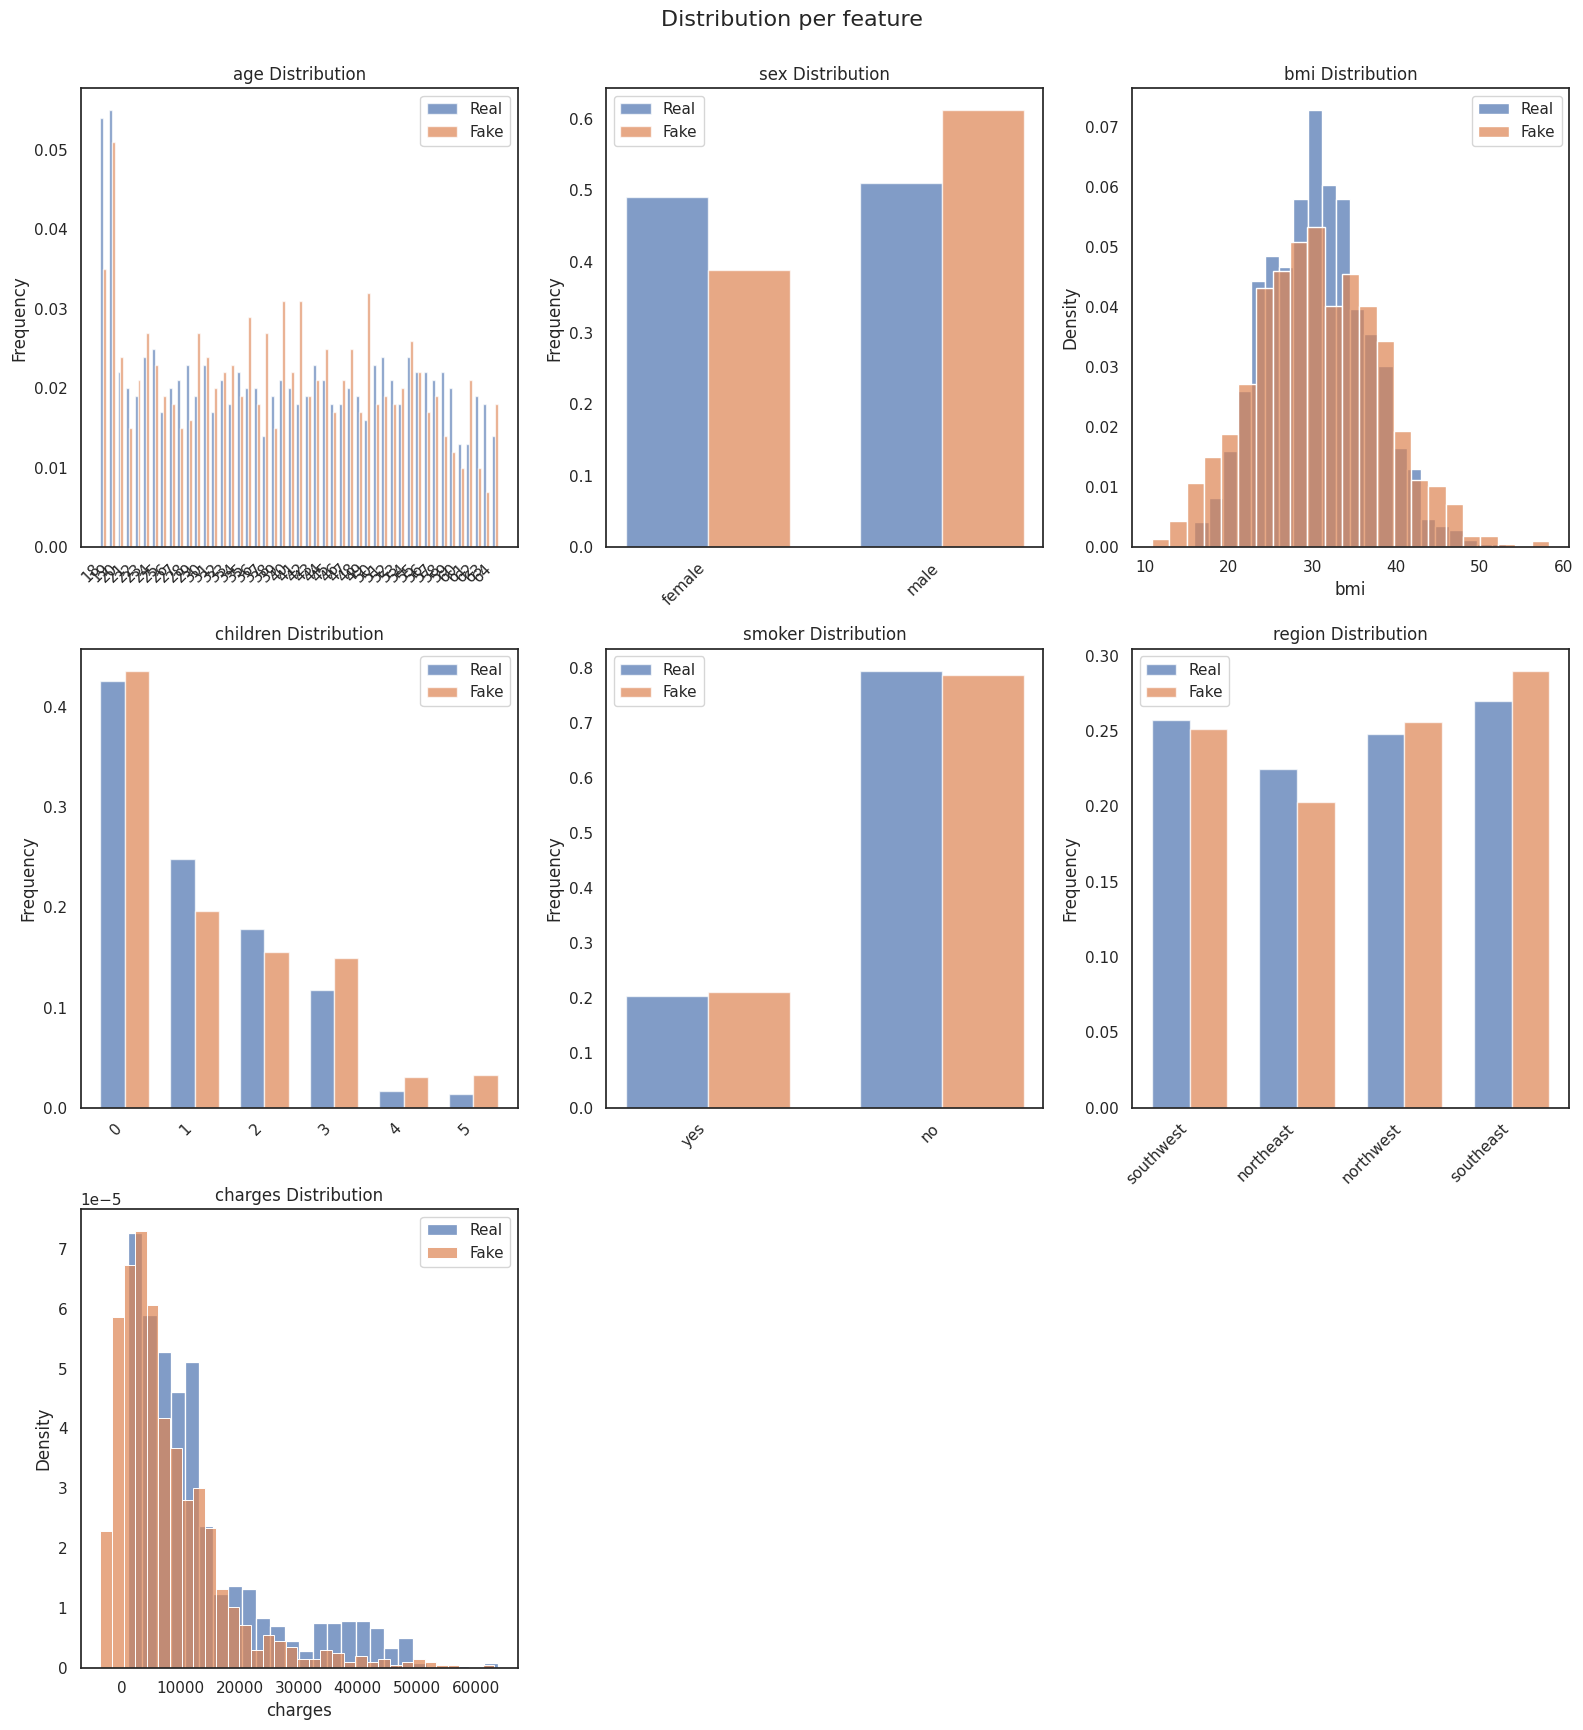

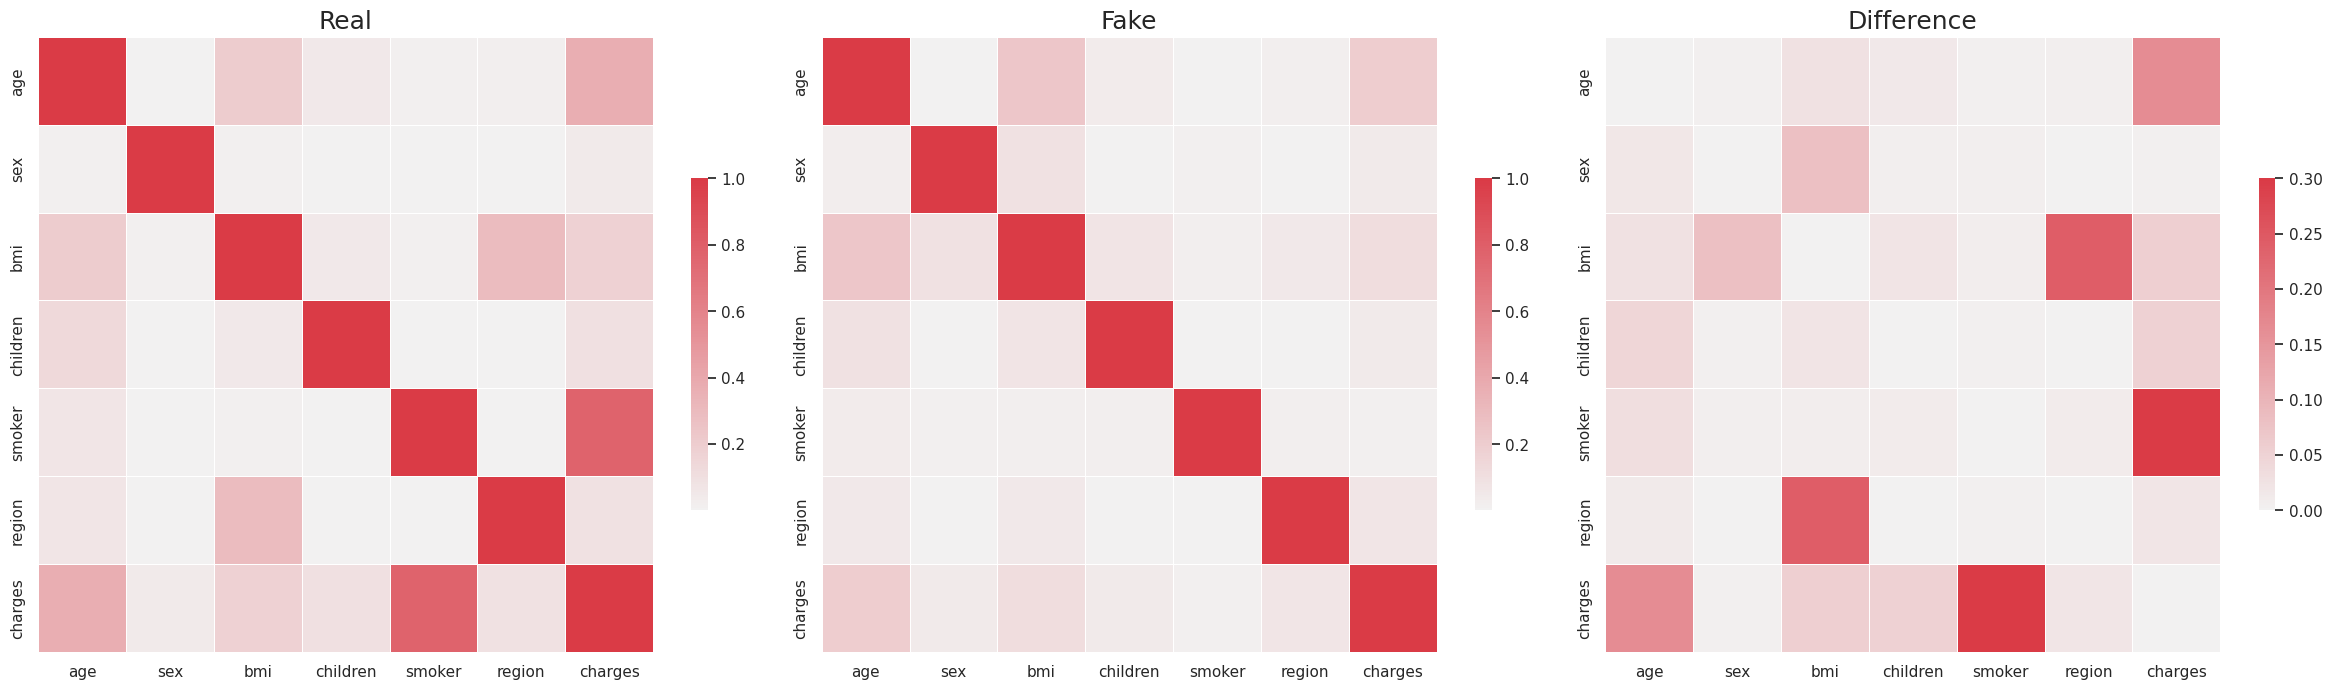

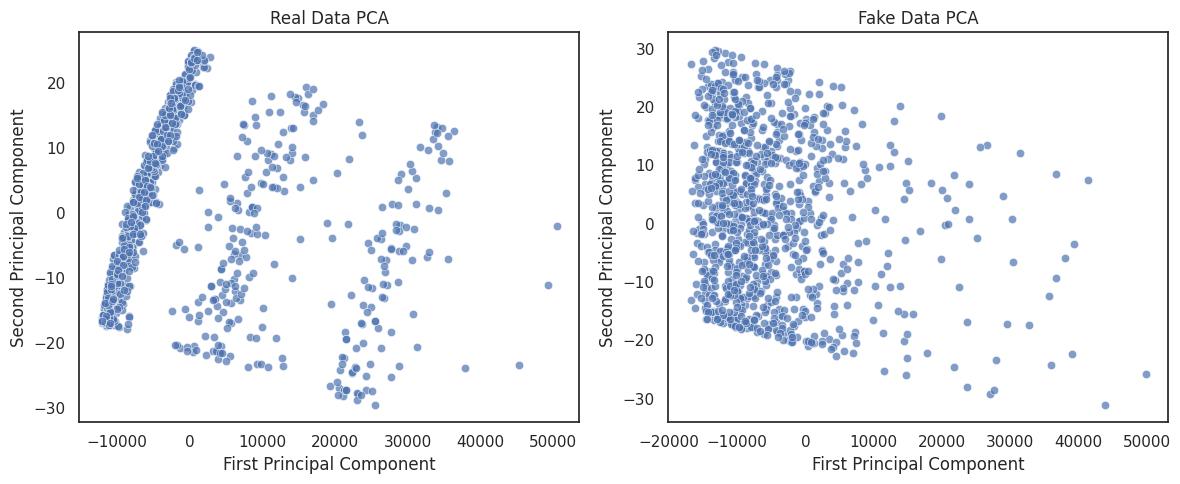

In [30]:
from table_evaluator import TableEvaluator
print(data.shape, samples.shape)
table_evaluator = TableEvaluator(data, samples, cat_cols = categorical_features)
table_evaluator.visual_evaluation()